In [1]:
from random import random
import matplotlib.pyplot as plt
from matplotlib.pylab import *
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from copy import deepcopy

# Task 1:

In [2]:
from numpy import linalg

def task1(mu): 
#1.1.AR first order:    
    a = 0.99
    checkpoint_W = None
    checkpoint_error = None
    for iteration in range(100):
        mean, std_dvt = 0, math.sqrt(0.02)
        e = np.random.normal(mean, std_dvt, size=5000)
        x = [_ for _ in range(5000)]
        x[0] = e[0]
        for i in range(1, 5000):
            if i == 1:
                x[1] = a*x[0] + e[1]
            else:
                x[i] = a*x[i-1] + e[i]
        x = np.asarray(x).reshape(5000, 1)
#1.2Train weigths:
        W = 0
        Wo = []

        Wo.append(W)
        Wo = np.asarray(Wo)

        x_predict = np.zeros((5000, 1))
        error = np.zeros((5000, 1))
        norm_error = np.zeros((5000, 1))
#1.2.1.Inital weigths: 
        x_predict[0, :] = 0 * W
        error[0, :] = x[0, :] - x_predict[0, :]
        norm_error[0] = linalg.norm(error[0, :])
        W = W + mu * error[0, :].T * 0
#1.2.2.Rest of the weights:
        for n in range(1,x.shape[0]):
            Wo = np.append(Wo, W)
            x_predict[n, :] = x[n-1, :] * W
            error[n, :] = x[n, :] - x_predict[n, :]
            norm_error[n] = linalg.norm(error[n, :])
            W = W + mu * error[n, :].T * x[n-1, :]
#1.2.3.Save weigths for next interation:
        if iteration == 0:
            checkpoint_W = np.copy(Wo)
            checkpoint_error = np.copy(error)
        else:
            checkpoint_W = np.concatenate((checkpoint_W, np.copy(Wo)), axis=0)
            checkpoint_error = np.concatenate((checkpoint_error, np.copy(error)), axis=0)
#1.3.Draw plot:
    checkpoint_W = checkpoint_W.reshape(100, 5000)
    checkpoint_error = checkpoint_error.reshape((100, 5000))
    sigu2 = 0.93627
    t = np.asarray(range(1, 5001))
    #formula graph:
    J = sigu2*(1-a**2)*(1+(mu/2)*sigu2) + sigu2*(a**2+(mu/2)*(a**2)*sigu2-0.5*mu*sigu2)*(1-mu*sigu2)**(2*t)
    #Experiment data point:
    J_mean = np.mean(np.square(checkpoint_error), axis=0)
    #plotting:
    plt.semilogy(J, 'r--',label='Theory')
    plt.semilogy(J_mean,'b--',label='Experiment')
    xlim(left=0)
    ylim(bottom=1/100)
    plt.ylabel('MSE')
    plt.xlabel('Number of iterations')
    plt.legend()
    plt.show()
    return


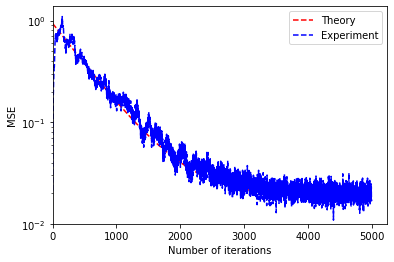

In [3]:
task1(0.001)#learning rate is 0.001

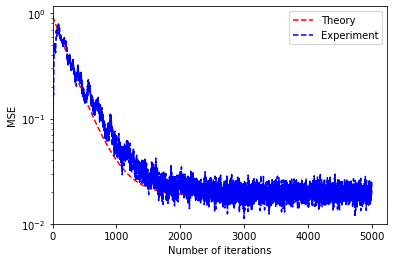

In [4]:
task1(0.002)#learning rate is 0.002

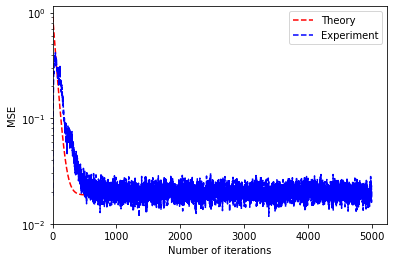

In [5]:
task1(0.01)#learning rate is 0.01

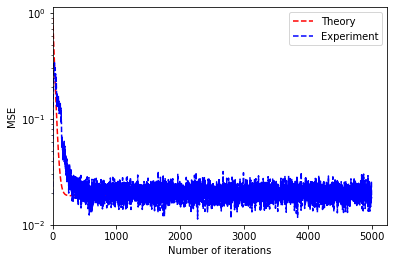

In [6]:
task1(0.02)# learning rate is 0.02

# Task 2:

In [8]:
def moon(num_points, distance, radius, width):
    '''
    Function to create the double moon
    '''

    points = num_points

    x1 = [0 for _ in range(points)]
    y1 = [0 for _ in range(points)]
    x2 = [0 for _ in range(points)]
    y2 = [0 for _ in range(points)]

    for i in range(points):
        d = distance
        r = radius
        w = width
        a = random() * math.pi
        x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + (
                    (-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
        y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

        a = random() * math.pi + math.pi
        x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + (
            (-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
        y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
    return ([x1, x2, y1, y2])

In [9]:
def processed_data(x1,x2,y1,y2,num_points):
    x1 = np.array(x1)
    x2 = np.array(x2)
    x = concatenate((x1, x2))
    output1 = np.ones(num_points)

    y1 = np.array(y1)
    y2 = np.array(y2)
    y = concatenate((y1, y2))
    output2 = np.zeros((num_points))

    X = np.vstack([x, y])
    Y = np.concatenate((output1, output2))

    return X.T, Y

In [47]:
def train(X, y, epochs, learningRate,num_points):
    Xn = np.ndarray.copy(X)
    yn = np.ndarray.copy(y)    
    mean,std = np.mean(Xn, axis=0),np.std(Xn, axis=0)
    Xn=(Xn-mean)/std
    y_mean = yn.mean(axis=0)
    yn=y-y_mean
    Xn = np.hstack((np.ones(Xn.shape[0])[np.newaxis].T, Xn))
    w = np.zeros(Xn[0].shape)
    mse_arr = []
    for i in range(epochs):
        sum_error = 0
        for x,y in zip(Xn, yn):
            y_pred = np.dot(x, w)    
            error = y - y_pred
            sum_error += error**2
            w = w + learningRate * x * error
        mse_arr.append(sum_error/num_points)
    return w, mse_arr

In [48]:
#reused code from my project 1:
def processed_data2(x,y,x0,y0):
    dataset1 = np.resize(deepcopy(x), (1, len(x)))
    dataset1 = np.append(dataset1, np.resize(deepcopy(y), (1, len(y))), axis=0)
    dataset1 = np.append(dataset1, np.ones((1, len(x)))*-1, axis=0)
    dataset1 = dataset1.transpose()
    
    dataset2 = np.resize(deepcopy(x0), (1, len(x0)))
    dataset2 = np.append(dataset2, np.resize(deepcopy(y0), (1, len(y0))), axis=0)
    dataset2 = np.append(dataset2, np.ones((1, len(x0))), axis=0)
    dataset2 = dataset2.transpose()
    dataset = np.append(dataset1, dataset2, axis=0)
    np.random.shuffle(dataset)
    return dataset

#plot moon function from project 1:
def display_result(weights,dataset):
    label_1_filter = dataset[:,0]*weights[1] + dataset[:,1]*weights[2] >= -weights[0]
    label_1_dataset = dataset[label_1_filter]
    label_2_filter = dataset[:,0]*weights[1] + dataset[:,1]*weights[2] < -weights[0]
    label_2_dataset = dataset[label_2_filter]
    
    min_x_value = -20
    max_x_value = 35
    x = np.asarray([min_x_value, max_x_value])
    y = -(weights[1]*x/weights[2]) - weights[0]/weights[2]
    plt.plot(x, y, c="g")
    plt.ylabel("y")
    plt.xlabel("x")
    
    plt.scatter(label_1_dataset[:, 0], label_1_dataset[:, 1], c='r',s=10)
    plt.scatter(label_2_dataset[:, 0], label_2_dataset[:, 1], c='b',s=10)
    plt.xlim(min_x_value, max_x_value)
    plt.show()


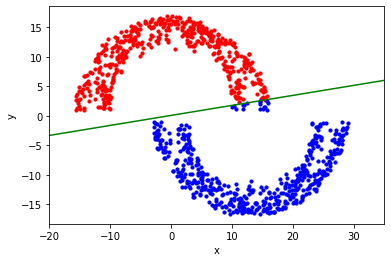

In [49]:
#Distance is 1:
learning_rate = 0.001
x1,x2,y1,y2 = moon(500, 1, 10, 6)
x,y=processed_data(x1,x2,y1,y2,500)
weights,mse=train(x,y,50,learning_rate,500)
dataset=processed_data2(x1,y1,x2,y2)
display_result(weights,dataset)

Distance is 1

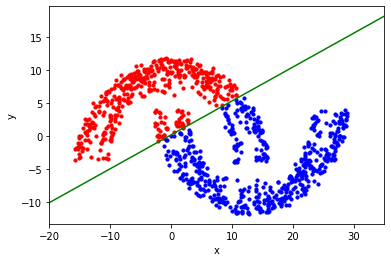

In [50]:
learning_rate = 0.001
x1,x2,y1,y2 = moon(500, -4, 10, 6)
x,y=processed_data(x1,x2,y1,y2,500)
weights,mse2=train(x,y,50,learning_rate,500)
dataset=processed_data2(x1,y1,x2,y2)
display_result(weights,dataset)

Distance is -4

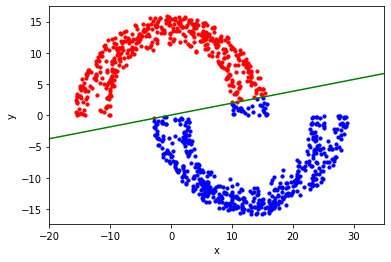

In [51]:
learning_rate = 0.001
x1,x2,y1,y2 = moon(500, 0, 10, 6)
x,y=processed_data(x1,x2,y1,y2,500)
weights,mse3=train(x,y,50,learning_rate,500)
dataset=processed_data2(x1,y1,x2,y2)
display_result(weights,dataset)

Distance is 0

# Task 4:

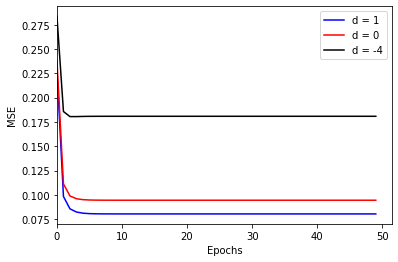

In [52]:
epochs = [i for i in range(50)]
plt.plot(epochs, mse, color='blue', label="d = 1")
plt.plot(epochs, mse3, color='red',  label="d = 0")
plt.plot(epochs, mse2, color='black', label="d = -4")
plt.ylabel('MSE')
plt.xlabel('Epochs')
xlim(left=0)
plt.legend()

# End